In [ ]:
from os import WIFCONTINUED
import numpy as np
import os.path as osp
import time
import sklearn
from sklearn.model_selection import train_test_split
import torch
import torch_geometric
from torch import nn
from torch_geometric.data import Data, DataLoader, DataListLoader
from torch_geometric.utils import degree
import torch.nn.functional as F
from torch.nn import ModuleList, Embedding
from torch.nn import Sequential, ReLU, Linear, GRUCell
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch_geometric.nn import PNAConv, BatchNorm, global_mean_pool, DataParallel
import argparse
import snntorch as snn

In [ ]:
# Set the parameters here
batch_size = 3
data_path = '/content/drive/MyDrive/atomic2field-main/atomic2field-main/data/'
input_dim = 2
num_data = 2000
num_layer = 14
hidden_dim = 50
max_degree = 4
epoch = 250    # changed from 500
scale_factor = 1e-6
timesteps = 1


if hidden_dim % 5 != 0:
    raise Exception("Sorry, not available hidden dimension, need to be multiple of 5")
if num_layer < 1:
    raise Exception("Sorry, the number of layer is not enough")

In [ ]:
class PNANet(torch.nn.Module):
    def __init__(self):
        super(PNANet, self).__init__()


        aggregators = ['mean', 'min', 'max', 'std']
        scalers = ['identity', 'amplification', 'attenuation']

        self.convs = ModuleList()
        self.batch_norms  = ModuleList()
        self.grus = ModuleList()

        # num_layer = args.num_layer
        # input_dim = args.input_dim
        # hidden_dim = args.hidden_dim

        # Defining the layers

        # Layer 1
        self.conv1 = PNAConv(in_channels=input_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=1, pre_layers=1, post_layers=1, divide_input=False)
        self.gru1 = GRUCell(input_dim, hidden_dim)
        self.batch_norm1 = BatchNorm(hidden_dim)

        # Layer 2
        self.conv2 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru2 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm2 = BatchNorm(hidden_dim)

        #Layer 3
        self.conv3 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru3 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm3 = BatchNorm(hidden_dim)

        #Layer 4
        self.conv4 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru4 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm4 = BatchNorm(hidden_dim)

        #Layer 5
        self.conv5 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru5 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm5 = BatchNorm(hidden_dim)

        #Layer 6
        self.conv6 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru6 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm6 = BatchNorm(hidden_dim)

        #Layer 7
        self.conv7 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru7 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm7 = BatchNorm(hidden_dim)

        #Layer 8
        self.conv8 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru8 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm8 = BatchNorm(hidden_dim)

        #Layer 9
        self.conv9 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru9 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm9 = BatchNorm(hidden_dim)

        #Layer 10
        self.conv10 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru10 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm10 = BatchNorm(hidden_dim)

        #Layer 11
        self.conv11 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru11 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm11 = BatchNorm(hidden_dim)

        #Layer 12
        self.conv12 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru12 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm12 = BatchNorm(hidden_dim)

        #Layer 13
        self.conv13 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru13 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm13 = BatchNorm(hidden_dim)

        #Layer 14
        self.conv14 = PNAConv(in_channels=hidden_dim, out_channels=hidden_dim, aggregators=aggregators, scalers=scalers, deg=deg, towers=5, pre_layers=1, post_layers=1, divide_input=False)
        self.gru14 = GRUCell(hidden_dim, hidden_dim)
        self.batch_norm14 = BatchNorm(hidden_dim)

        self.readout = PNAConv(in_channels=hidden_dim, out_channels=1, aggregators=aggregators, scalers=scalers, deg=deg, towers=1, pre_layers=1, post_layers=1, divide_input=False)


    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # For Layer 1
        y = self.conv1(x, edge_index)
        x = self.gru1(x, y)
        x = F.relu(self.batch_norm1(x))

        # For Layer 2
        y = self.conv2(x, edge_index)
        x = self.gru2(x, y)
        x = F.relu(self.batch_norm2(x))

        # For Layer 3
        y = self.conv3(x, edge_index)
        x = self.gru3(x, y)
        x = F.relu(self.batch_norm3(x))

        # For Layer 4
        y = self.conv4(x, edge_index)
        x = self.gru4(x, y)
        x = F.relu(self.batch_norm4(x))

        # For Layer 5
        y = self.conv5(x, edge_index)
        x = self.gru5(x, y)
        x = F.relu(self.batch_norm5(x))

        # For Layer 6
        y = self.conv6(x, edge_index)
        x = self.gru6(x, y)
        x = F.relu(self.batch_norm6(x))


        # For Layer 7
        y = self.conv7(x, edge_index)
        x = self.gru7(x, y)
        x = F.relu(self.batch_norm7(x))

        # For Layer 8
        y = self.conv8(x, edge_index)
        x = self.gru8(x, y)
        x = F.relu(self.batch_norm8(x))

        # For Layer 9
        y = self.conv9(x, edge_index)
        x = self.gru9(x, y)
        x = F.relu(self.batch_norm9(x))

        # For Layer 10
        y = self.conv10(x, edge_index)
        x = self.gru10(x, y)
        x = F.relu(self.batch_norm10(x))

        # For Layer 11
        y = self.conv11(x, edge_index)
        x = self.gru11(x, y)
        x = F.relu(self.batch_norm11(x))

        # For Layer 12
        y = self.conv12(x, edge_index)
        x = self.gru12(x, y)
        x = F.relu(self.batch_norm12(x))

        # For Layer 13
        y = self.conv13(x, edge_index)
        x = self.gru13(x, y)
        x = F.relu(self.batch_norm13(x))

        # For Layer 14
        y = self.conv14(x, edge_index)
        x = self.gru14(x, y)
        x = F.relu(self.batch_norm14(x))


        x = self.readout(x, edge_index)

        return x

In [ ]:
f1 = open(data_path + "edge.txt", "r")
f2 = open(data_path + "node_features.txt", "r")
f3 = open(data_path + "node_labels_sxx.txt", "r")
lines1 = f1.readlines()
lines2 = f2.readlines()
lines3 = f3.readlines()

In [ ]:
data_list = []
for i in range(550):
    # if i % 200 == 0:
    #     print(i, time.time() - t0)
    node1 = [int(idx) for idx in lines1[2 * i].split()[1:]]
    node2 = [int(idx) for idx in lines1[2 * i + 1].split()[1:]]
    edge_index = torch.tensor([node1, node2], dtype=torch.long)
    if input_dim == 1:
      xs = [float(idx) for idx in lines2[i].split()[1:]]
      node_feature = [[xs[j]] for j in range(len(xs))]
    elif input_dim == 2:
      xs = [float(idx) for idx in lines2[2 * i].split()[1:]]
      ys = [float(idx) for idx in lines2[2 * i + 1].split()[1:]]
      node_feature = [[xs[j], ys[j]] for j in range(len(xs))]
    elif input_dim == 3:
      xs = [float(idx) for idx in lines2[3 * i].split()[1:]]
      ys = [float(idx) for idx in lines2[3 * i + 1].split()[1:]]
      zs = [float(idx) for idx in lines2[3 * i + 2].split()[1:]]
      node_feature = [[xs[j], ys[j], zs[j]] for j in range(len(xs))]
    elif input_dim == 4:
      xs = [float(idx) for idx in lines2[4 * i].split()[1:]]
      ys = [float(idx) for idx in lines2[4 * i + 1].split()[1:]]
      zs = [float(idx) for idx in lines2[4 * i + 2].split()[1:]]
      ls = [float(idx) for idx in lines2[4 * i + 3].split()[1:]]
      node_feature = [[xs[j], ys[j], zs[j], ls[j]] for j in range(len(xs))]
    else:
        raise Exception("Sorry, not available input dimension")

    x = torch.tensor(node_feature, dtype=torch.float)
    node_label = [float(idx) * scale_factor for idx in lines3[i].split()[1:]]
    y = torch.tensor(node_label, dtype=torch.float)
    data = Data(x=x, edge_index=edge_index, y=y)
    data_list.append(data)

In [ ]:
test_loader = DataListLoader(torch.load("test_dataset.pt",weights_only=False))

In [ ]:
deg = torch.zeros(max_degree, dtype=torch.long)

for data in data_list:
  d = degree(data.edge_index[1], num_nodes=data.num_nodes, dtype=torch.long)
  deg += torch.bincount(d, minlength=deg.numel())

device = 'cpu'
model = PNANet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=20, min_lr=-1e-5, verbose=True)
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])

In [ ]:
# Load the model checkpoint at epoch 240
checkpoint = torch.load('/content/drive/MyDrive/atomic2field-main/atomic2field-main/trained/240_original.pt',map_location=torch.device('cpu'))
# print(checkpoint['model_state_dict'])
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch'] + 1  # Start from the next epoch

In [ ]:
# select data point
n = 200

In [ ]:
xs_n = []
for i in range(data_list[n].x.shape[0]):
  xs_n.append(data_list[n].x[i][0].item())

In [ ]:
# print(len(xs_n))

In [ ]:
ys_n = []
for i in range(data_list[n].x.shape[0]):
  ys_n.append(data_list[n].x[i][1].item())

In [ ]:
data_list[n].y

tensor([2.0262, 2.8001, 3.2015,  ..., 2.5752, 1.1385, 1.4556])

In [ ]:
node_y=[]
for i in range(data_list[n].y.shape[0]):
  node_y.append(data_list[n].y[i].item())

In [ ]:
X = np.array(xs_n)
Y = np.array(ys_n)
print(len(xs_n))
print(len(ys_n))

uX = np.unique(X)
uY = np.unique(Y)

print(uX)

In [ ]:
def prediction(model, dataloader, device):
    model.eval()
    predictions = []
    i=0
    with torch.no_grad():
      for batch_idx, data_batch in enumerate(dataloader):
            for data in data_batch:
              if i==n:
                pred = model(data.to(device))
              i+=1
    return pred

In [ ]:
predi = prediction(model, test_loader, device)

In [ ]:
coord_matrix = [[0 for i in range(len(uY))] for j in range(len(uX))]

print(coord_matrix)

In [ ]:
for i in range(len(xs_n)):
  a = np.where(np.isclose(uX, xs_n[i],rtol=1e-05))
  # b = uY.index(ys[i]);
  b = np.where(np.isclose(uY, ys_n[i],rtol=1e-05))
  # print(a[0][0]); print(b[0])
  n1 = a[0][0]; n2=b[0][0]
  # coord_matrix[n1][n2] = predi[0][i]
  coord_matrix = np.array(coord_matrix)
  if 0 <= n1 < coord_matrix.shape[0] and 0 <= n2 < coord_matrix.shape[1]:
    # print(n1,n2," ")
    coord_matrix[n1][n2] = node_y[i]
  else:
    print("Invalid indices:", n1, n2)

In [ ]:
coord_matrix = np.array(coord_matrix, dtype=object)

In [ ]:
if coord_matrix.dtype == object:
    # Convert to a suitable numeric data type (e.g., float32)
    coord_matrix = coord_matrix.astype(np.float32)

In [ ]:
print(coord_matrix)

In [ ]:
import matplotlib.pyplot as plt

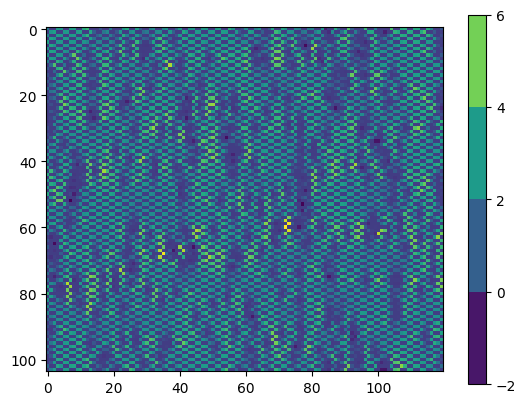

In [ ]:
plt.imshow(coord_matrix)
# colorbar = plt.colorbar()
boundaries = [-2,0,2,4,6]
colorbar = plt.colorbar(boundaries = boundaries)
plt.show()